In [1]:
import os
import sys

from typing import List

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from infovar import ContinuousHandler

sys.path.insert(0, os.path.join("..", ".."))
sys.path.insert(1, os.path.join(".."))

from infobs.plots import Plotter
from orion_util import latex_line, latex_param 

plt.rc("text", usetex=True)
data_dir = os.path.join("..", "data", "continuous")
figures_dir = os.path.join("continuous_images")

## Configuration of Handler

In [2]:
handler = ContinuousHandler()

handler.set_paths(
    save_path=data_dir
)

## Configuration of Plotter

In [3]:
plotter = Plotter(
    line_formatter=latex_line,
    param_formatter=latex_param
)

latex_comb_lines = lambda ls: plotter.lines_comb_formatter(ls, short=True)
latex_comb_params = lambda ps: plotter.params_comb_formatter(ps)

## Settings

In [4]:
lims = {
    'av': [1e+0, 8e+1],
    'g0': [None, None]
}

In [5]:
params_target = "av"            # Can be "av", "g0" or ["av", "g0"]
params_regime = ["av", "g0"]    # Cannot be modified
lines_list = handler.get_available_variables(params_target)

In [6]:
# lines_list = [ls for ls in lines_list if "n2hp10" in ls]

## Formatting

In [7]:
if isinstance(params_target, str):
    params_target = [params_target]
assert isinstance(params_target, List)

if isinstance(lines_list, str):
    lines = [lines_list]
assert isinstance(lines_list, List)

for i, l in enumerate(lines_list):
    if isinstance(l, str):
        lines_list[i] = [l]
    assert isinstance(lines_list[i], List)

## Number of samples

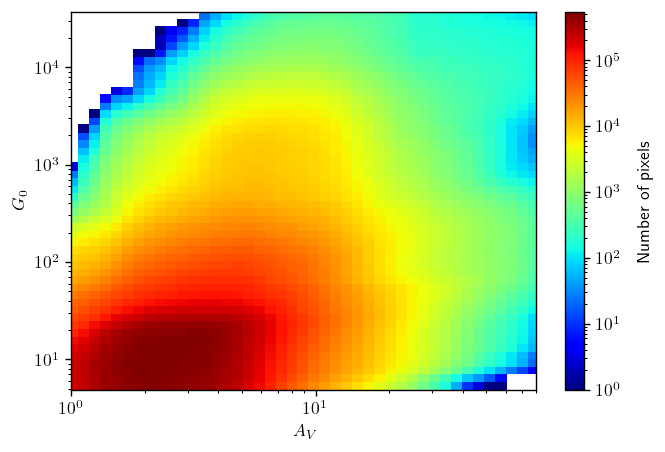

In [8]:
plt.figure(dpi=125)

d = handler.read(
    params_target, lines_list[0], params_regime
)

xticks, yticks = d["mi"][f'coords']
mat = d["mi"]['samples'].T

X, Y = np.meshgrid(xticks, yticks)

np.seterr(divide='ignore')
plt.pcolor(X, Y, mat, cmap="jet", norm=LogNorm(1, None))
cbar = plt.colorbar()
cbar.set_label("Number of pixels", labelpad=10)

plt.xscale('log')
plt.yscale('log')
plt.xlim(lims[params_regime[0]])
plt.ylim(lims[params_regime[1]])

plt.xlabel(f"${latex_param(params_regime[0])}$")
plt.ylabel(f"${latex_param(params_regime[1])}$")

filename = "pixels.png"
plt.savefig(os.path.join(figures_dir, filename))
plt.show()

## Images

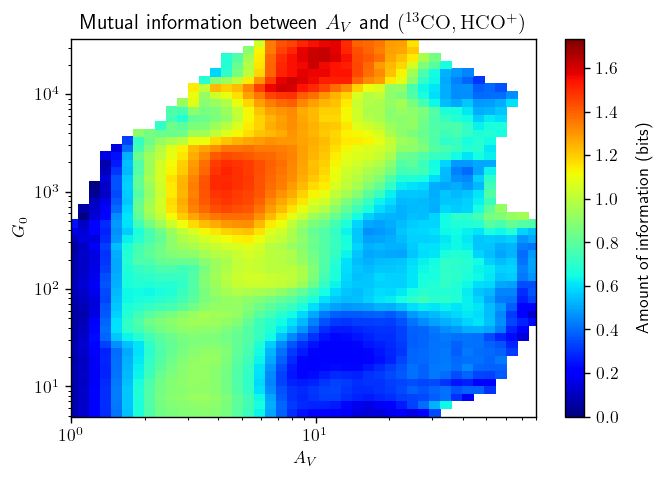

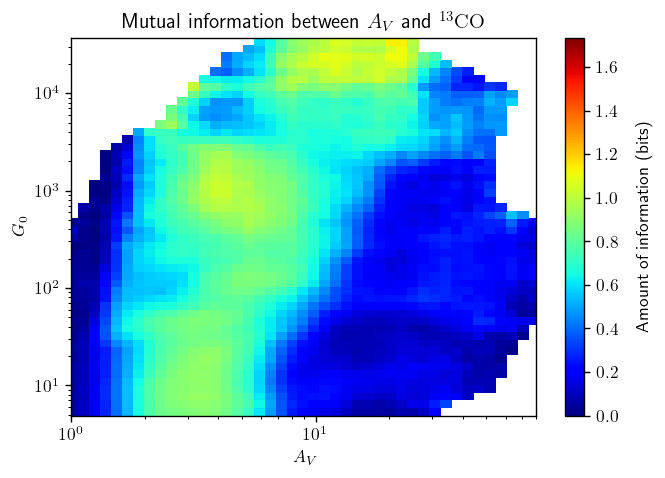

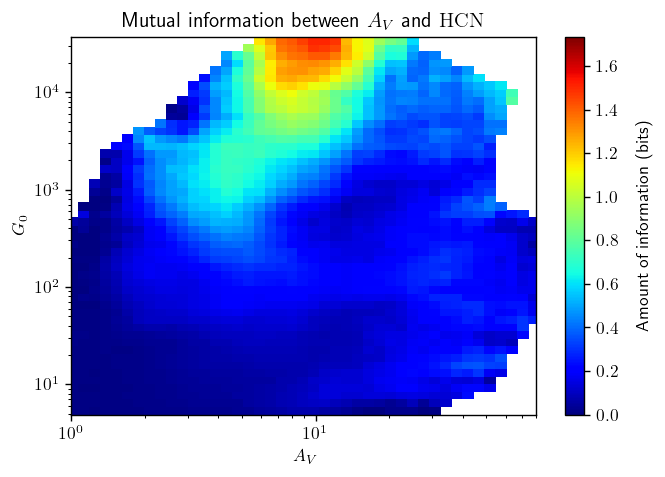

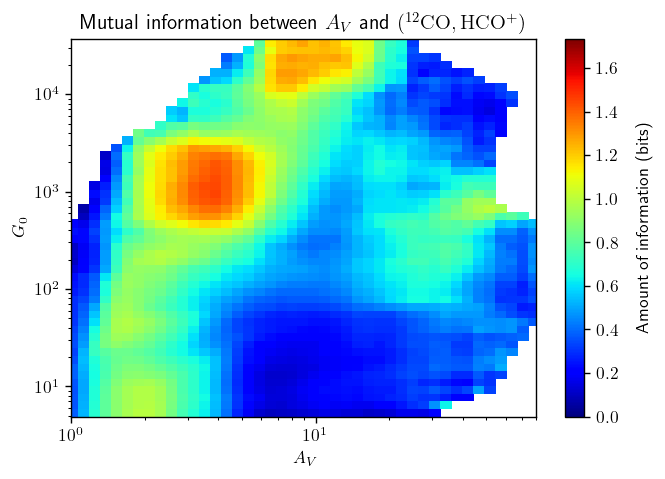

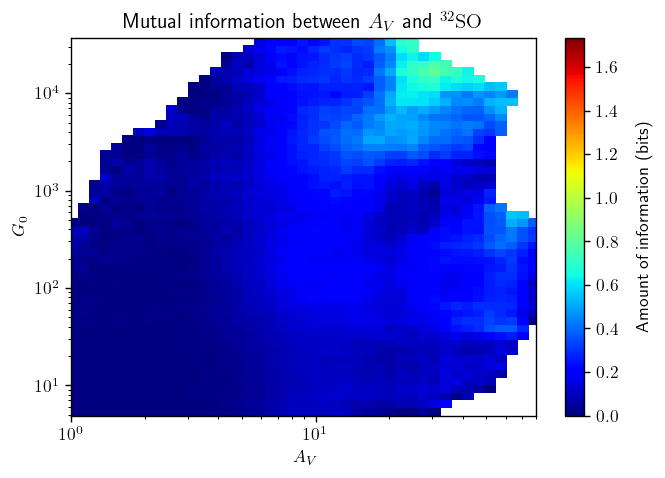

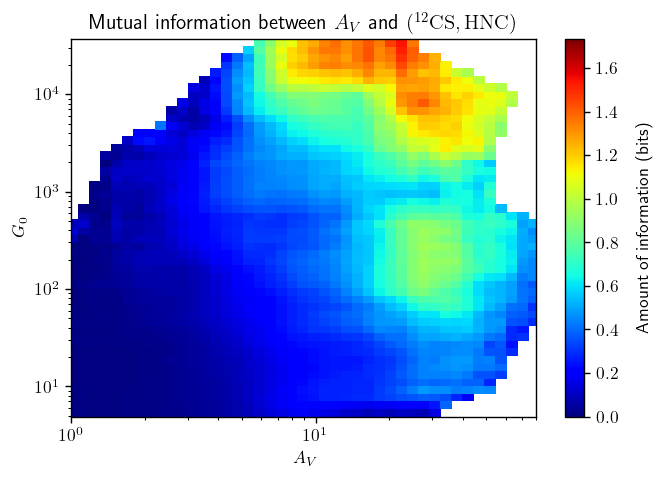

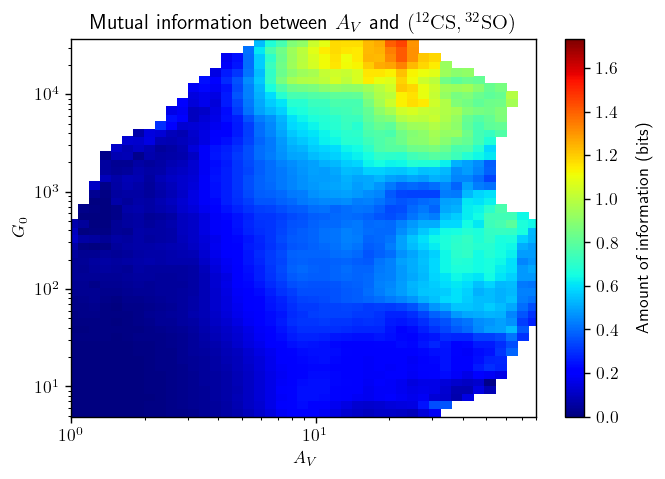

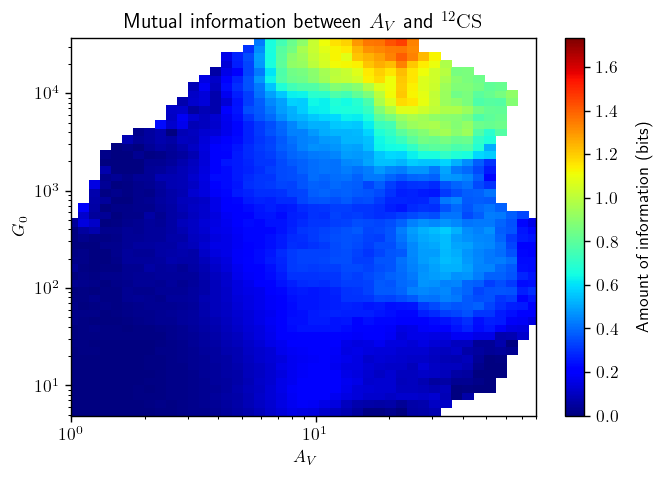

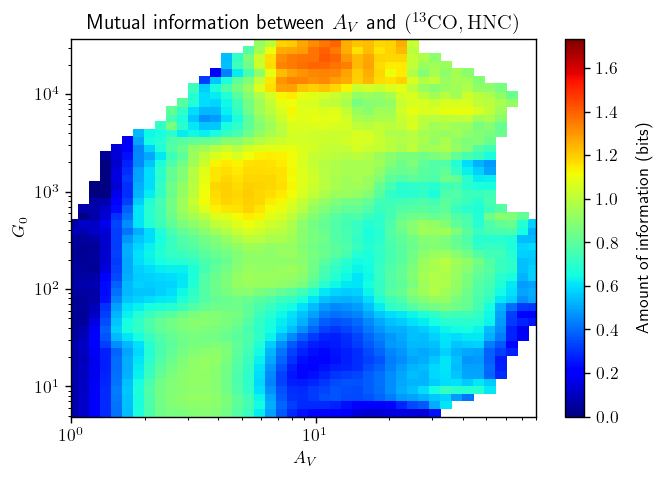

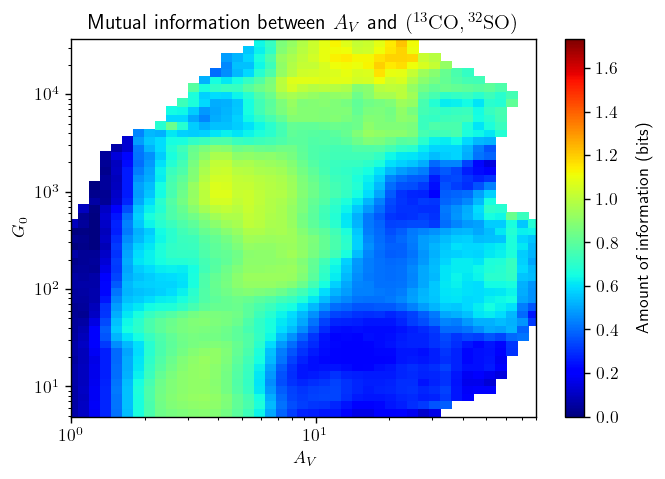

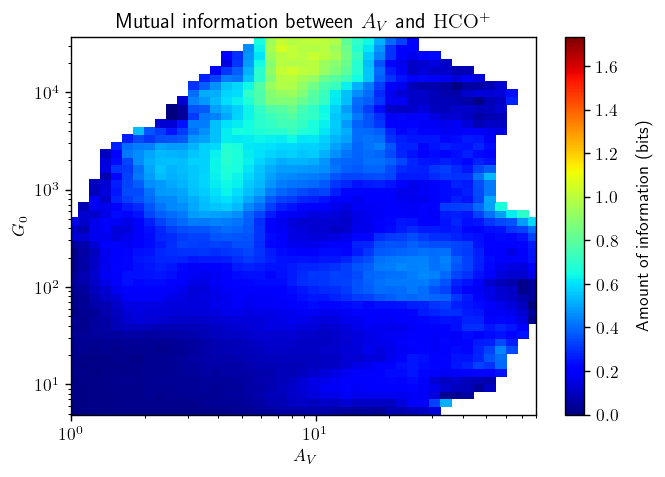

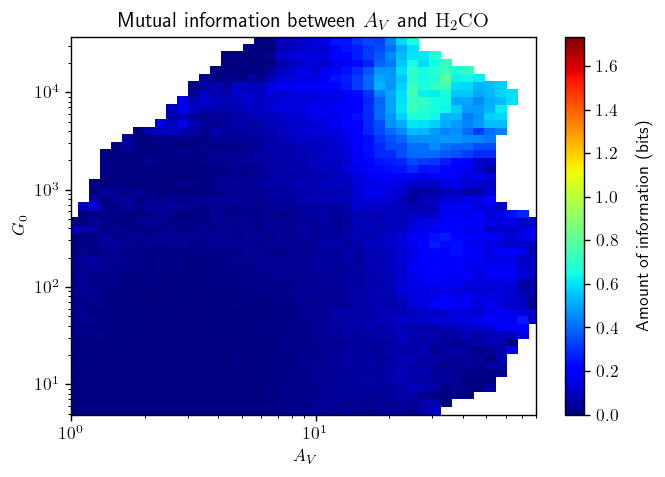

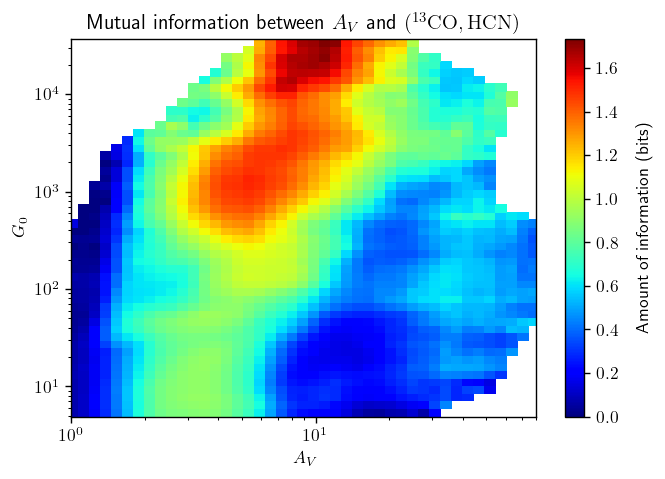

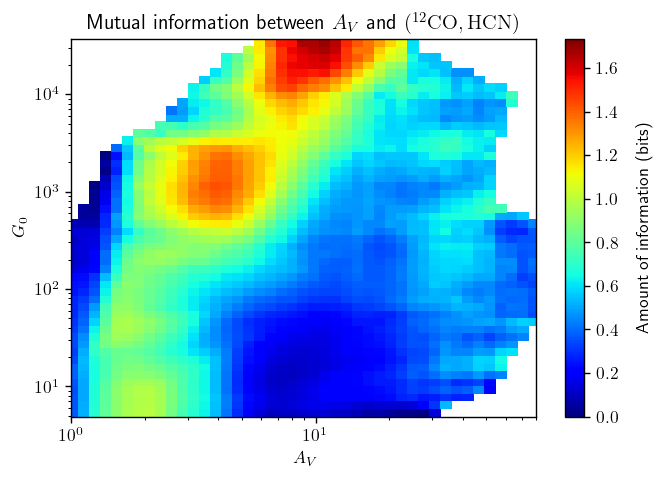

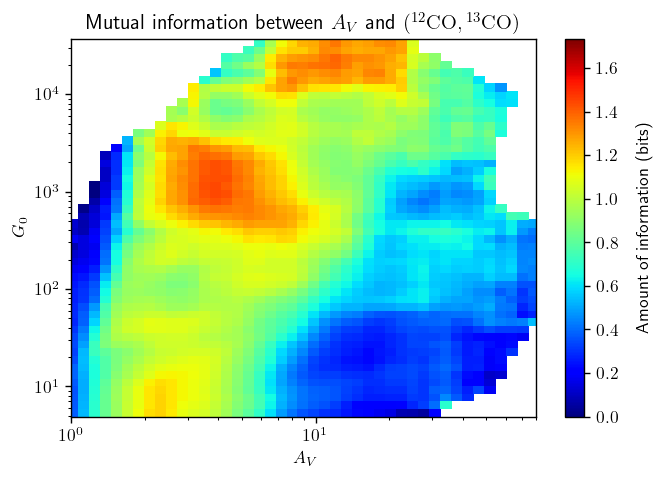

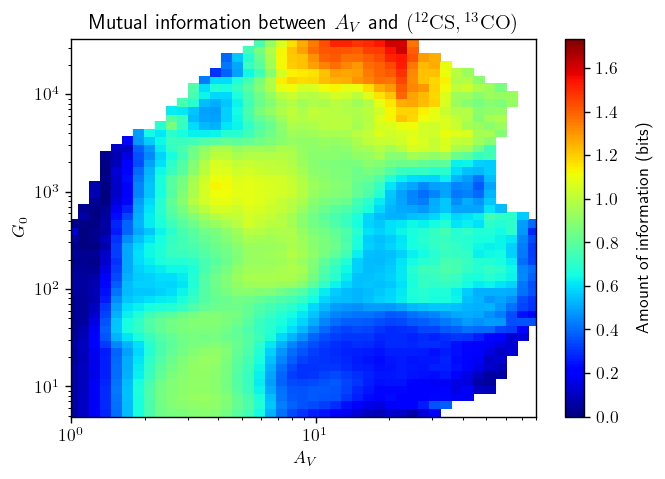

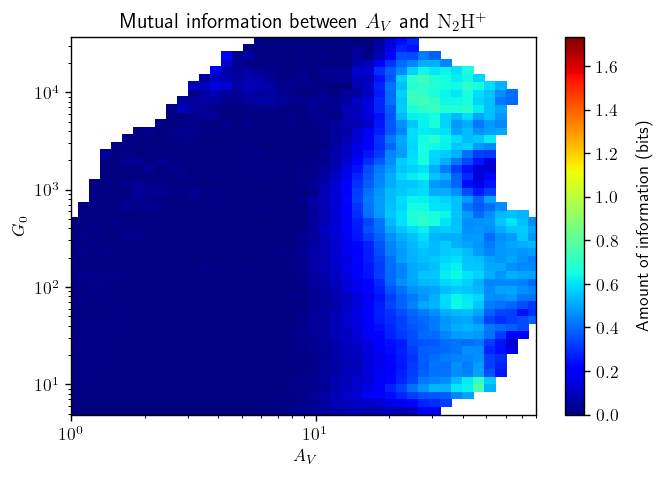

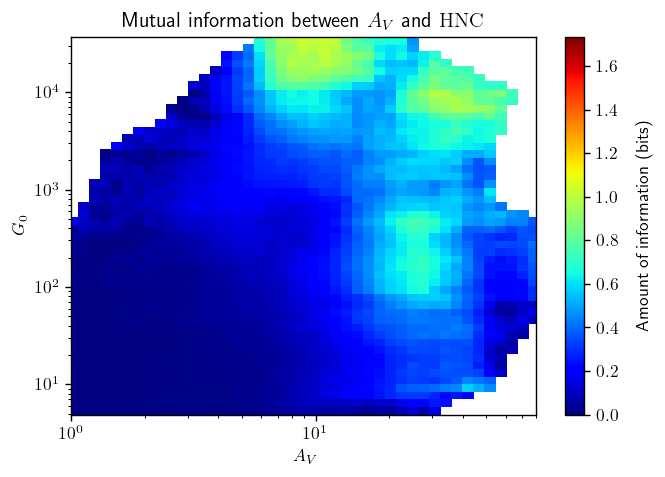

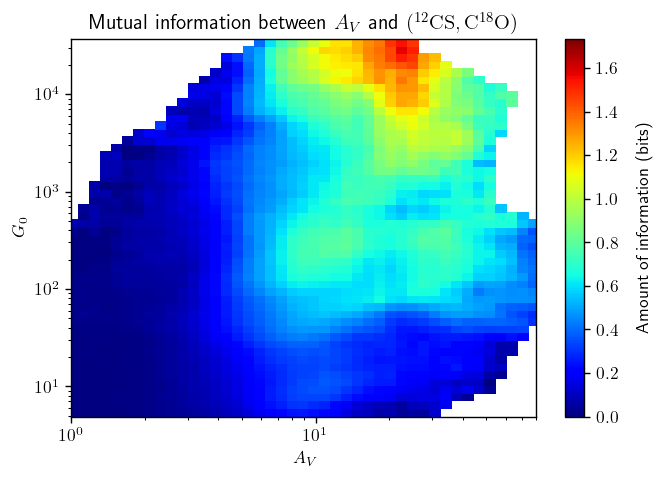

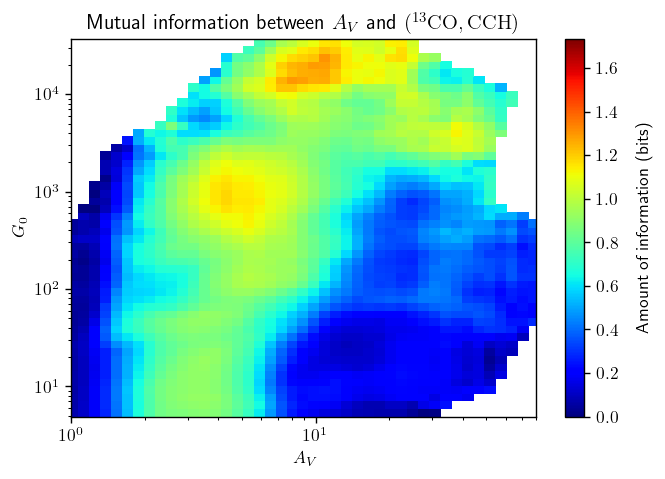

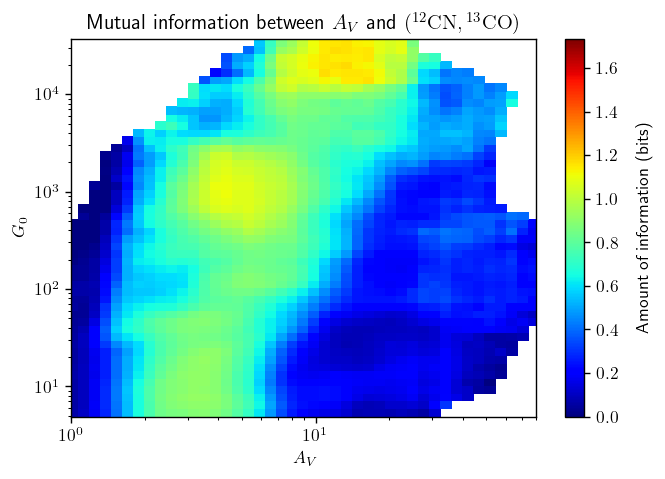

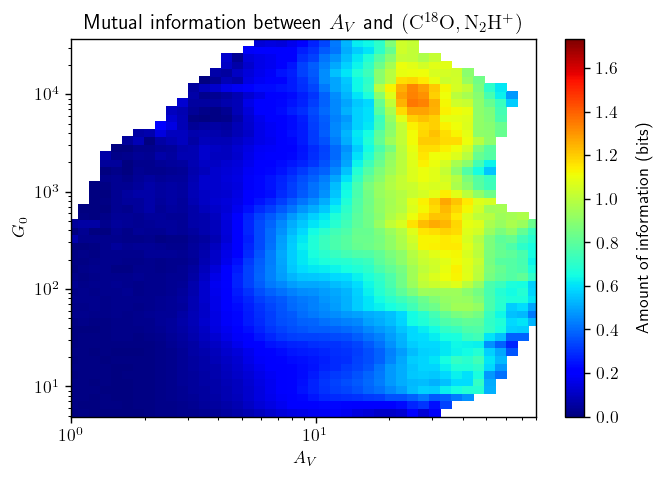

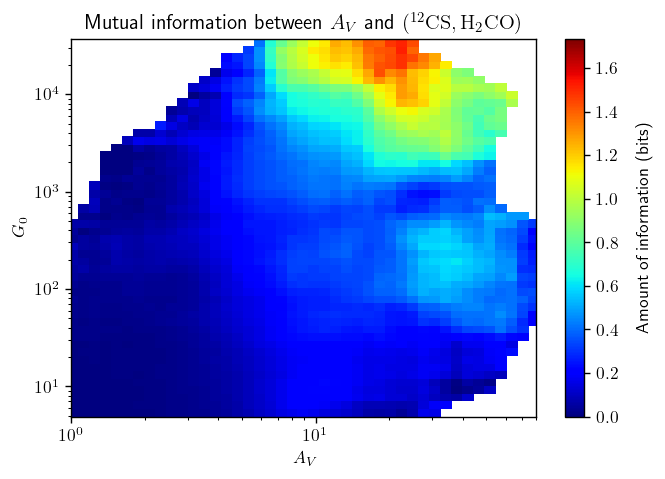

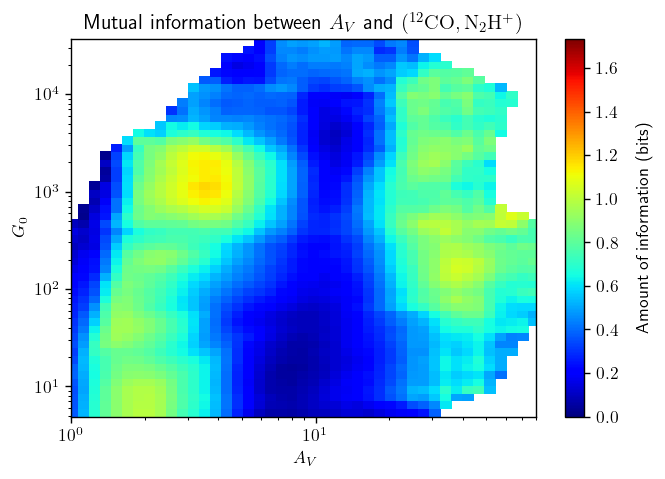

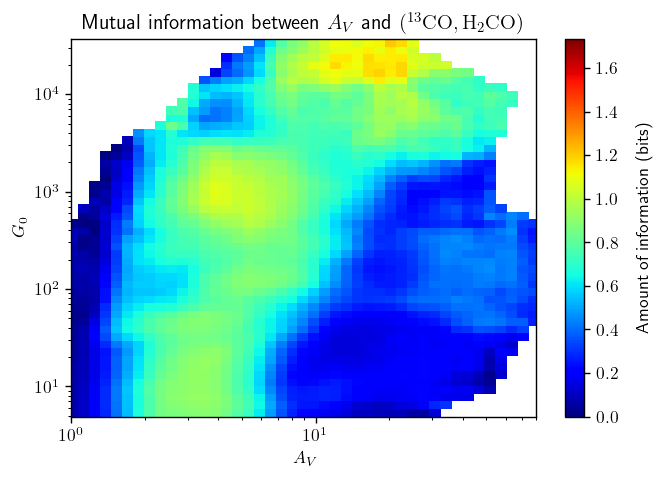

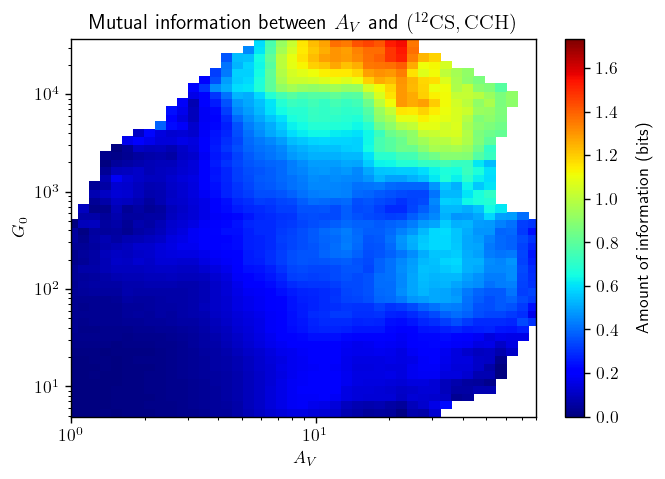

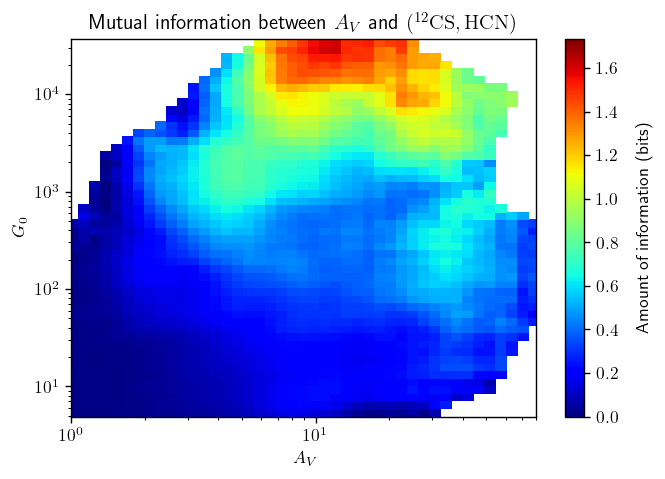

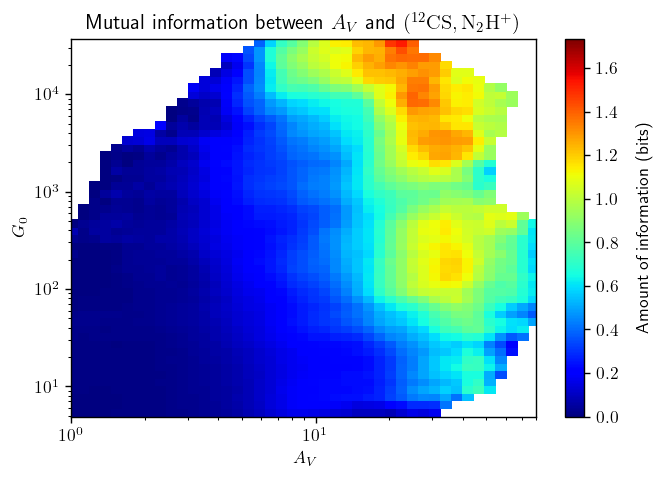

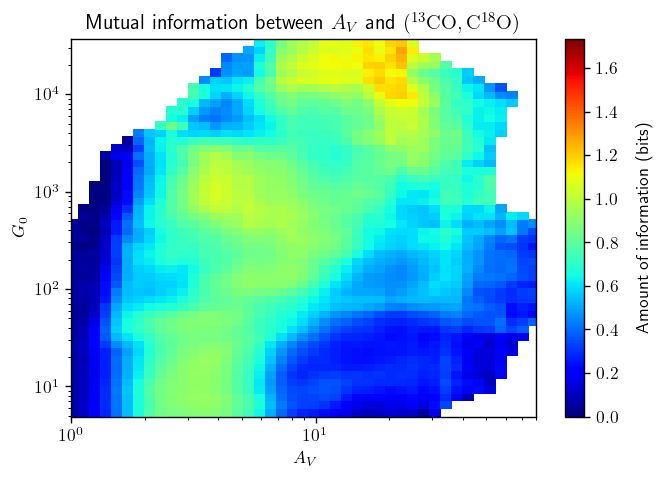

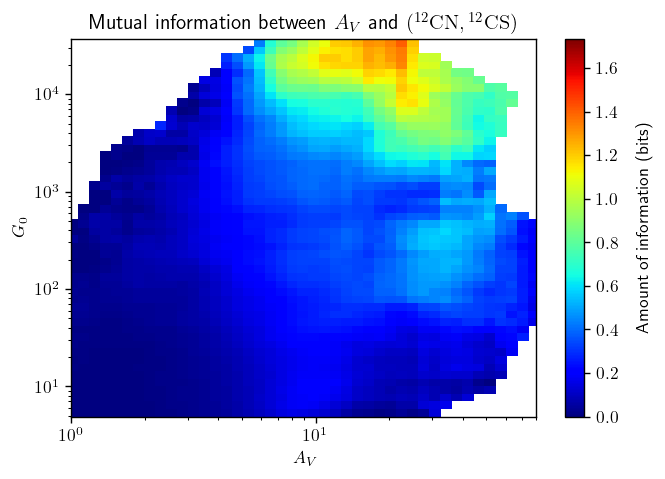

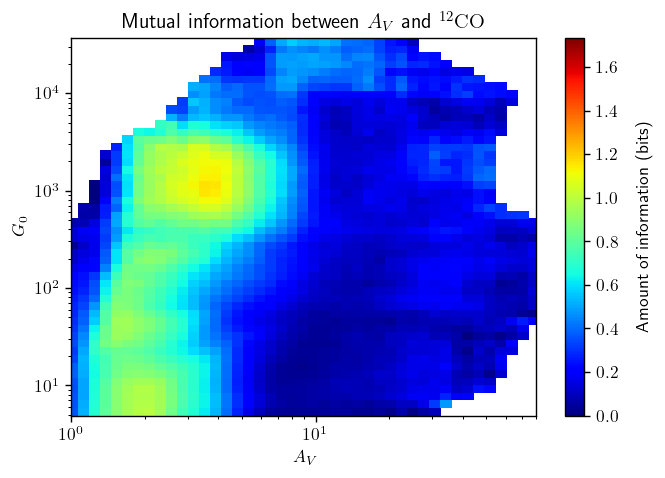

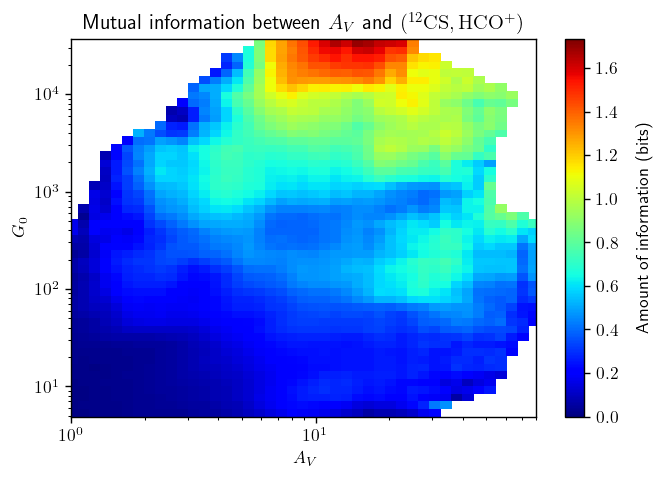

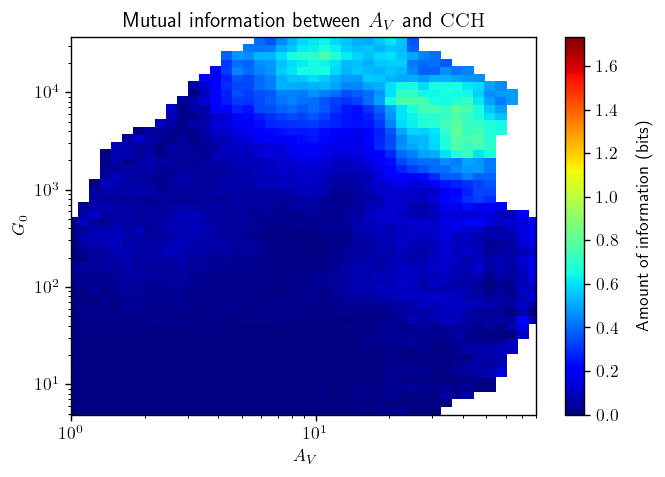

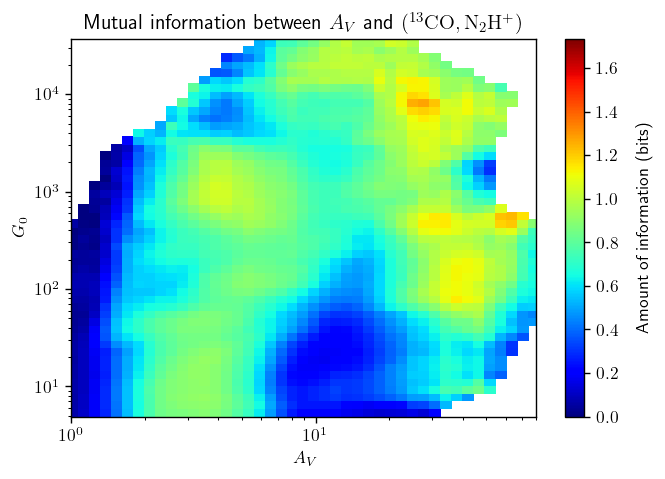

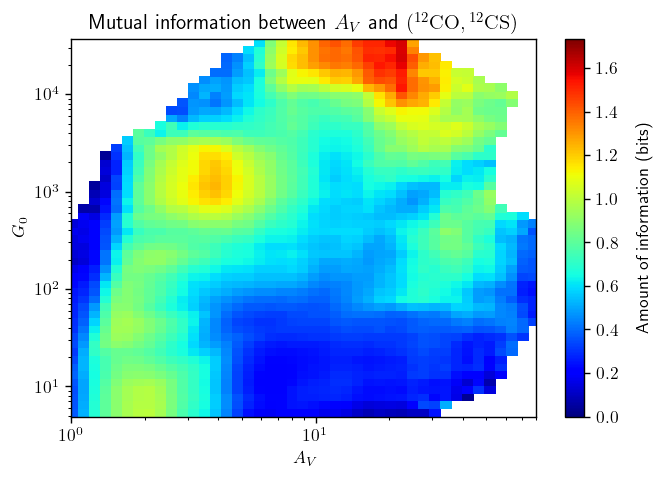

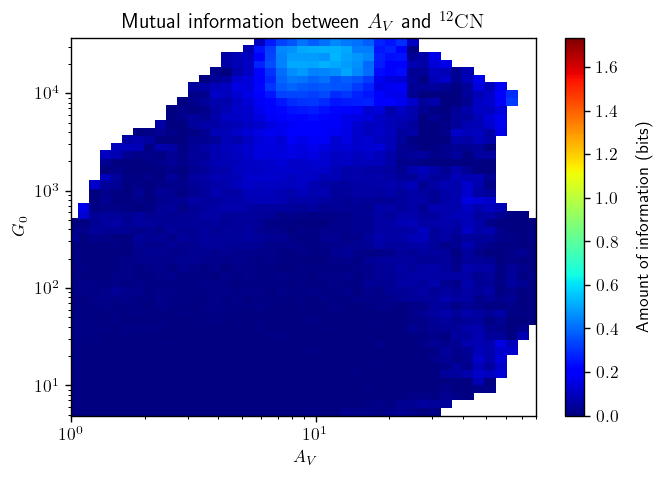

In [9]:
vmax = 0
for lines in lines_list:
    try:
        d = handler.read(
            params_target, lines, params_regime
        )
    except:
        continue
    vmax = max(vmax, np.nanmax(d['mi']['data']))

for lines in lines_list:

    try:
        d = handler.read(
            params_target, lines, params_regime
        )
    except:
        continue

    xticks, yticks = d['mi']['coords']
    mat_mi = d['mi']['data'].T
    
    filename = f"{'_'.join(params_target)}__{'_'.join(lines)}_mi.png"
    fig = plotter.plot_mi_map(
        xticks, yticks, mat_mi,
        vmax=vmax, cmap="jet",
        paramx=params_regime[0], paramy=params_regime[1]
    )

    plt.xlim(lims[params_regime[0]]); plt.ylim(lims[params_regime[1]])
    plt.title(f"Mutual information between ${plotter.params_comb_formatter(params_target)}$ and ${plotter.lines_comb_formatter(lines, short=True)}$")

    plt.savefig(os.path.join(figures_dir, filename))
    plt.show()

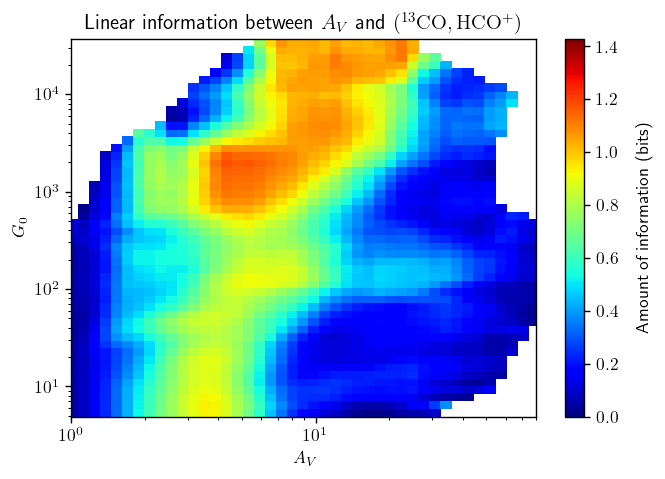

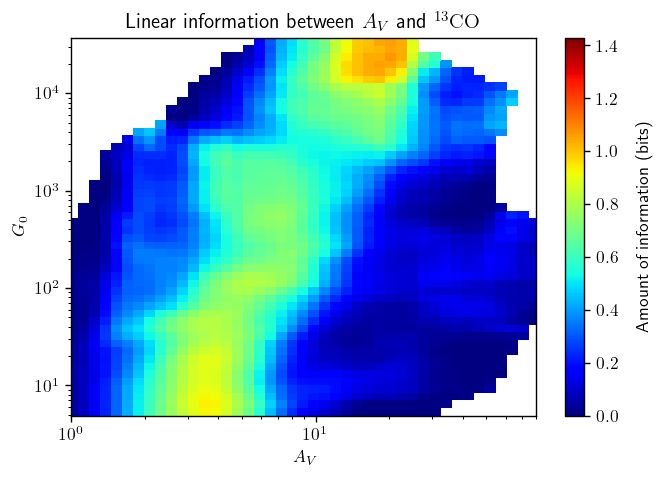

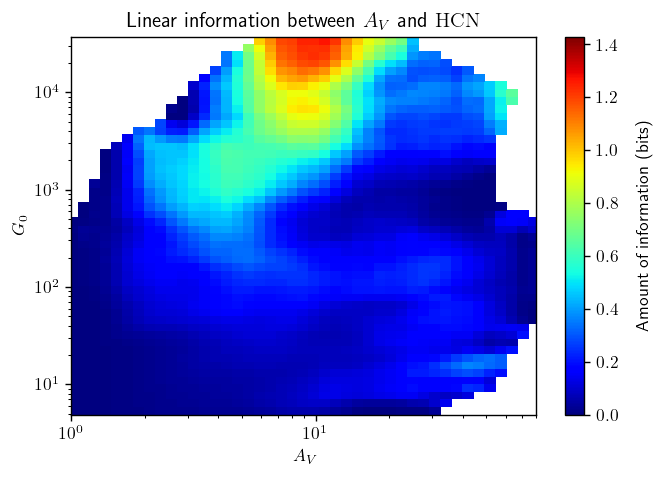

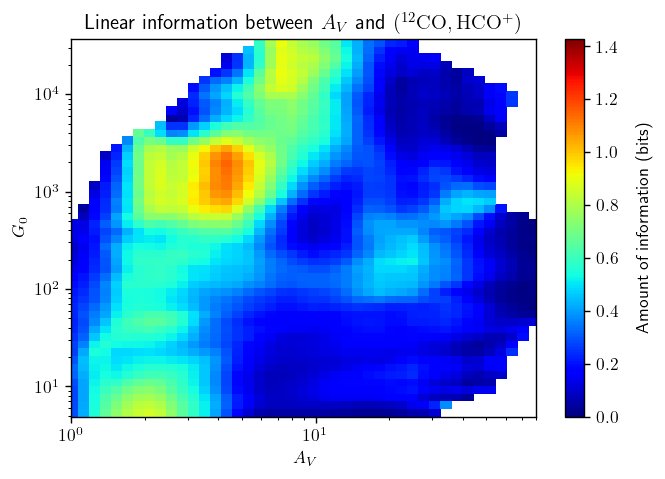

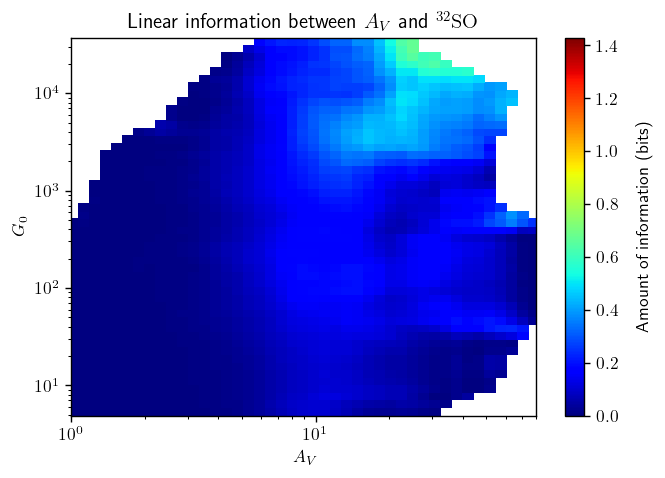

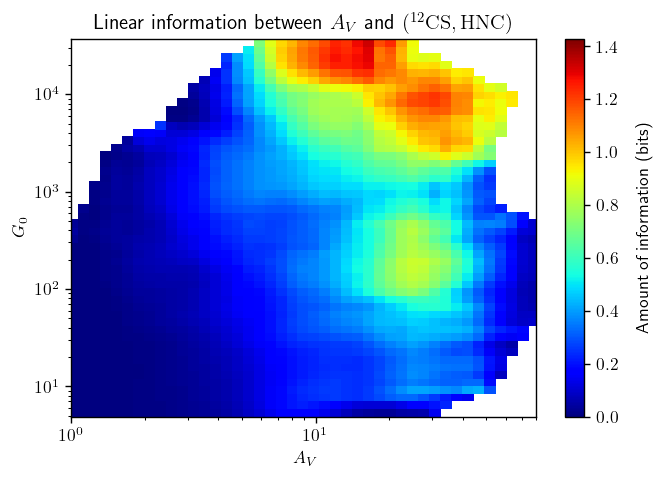

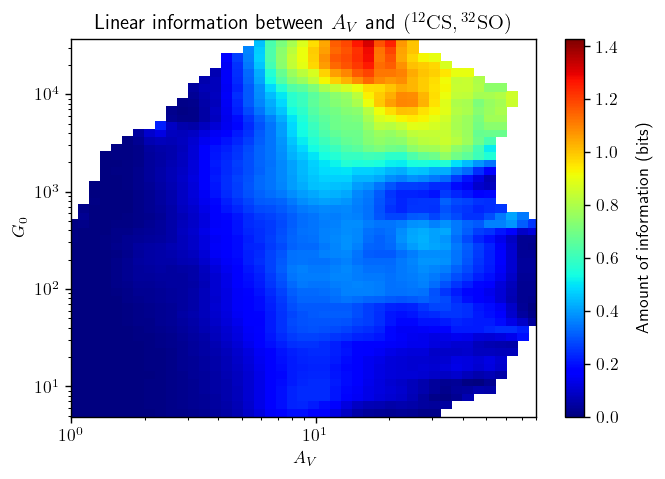

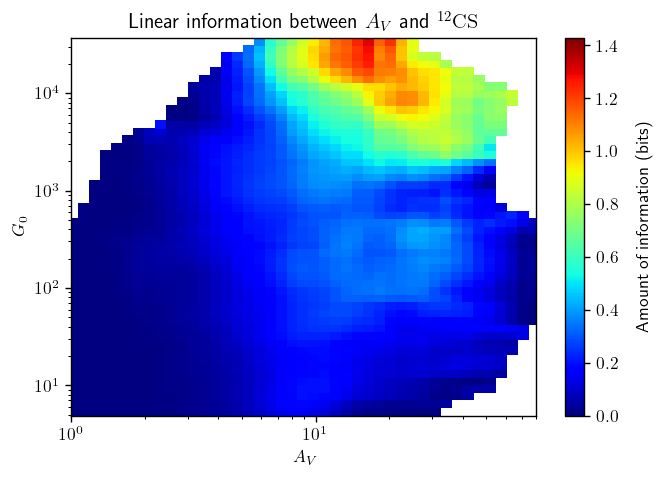

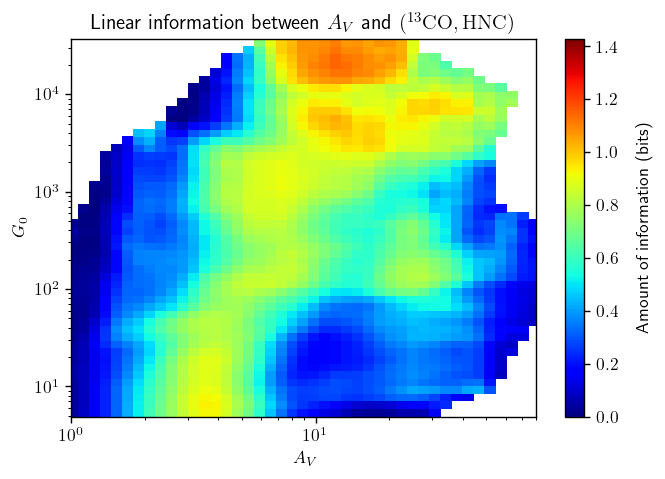

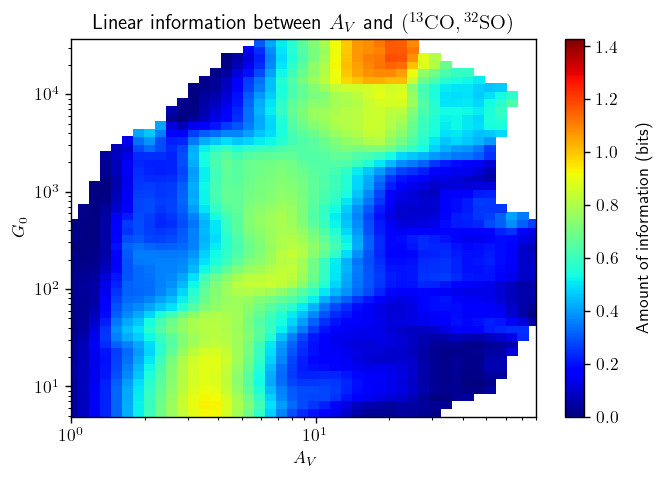

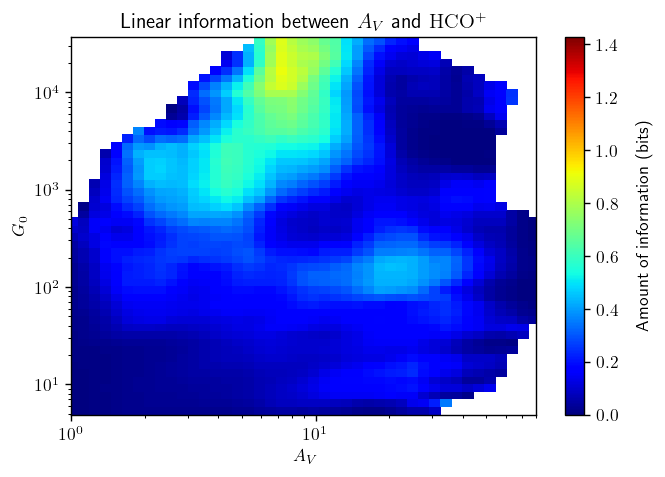

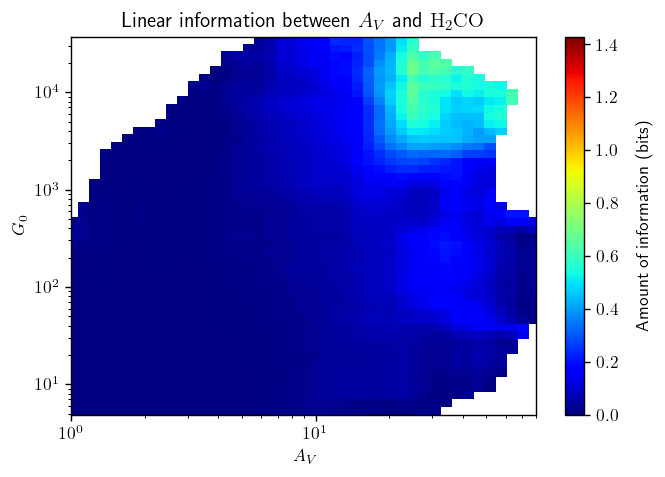

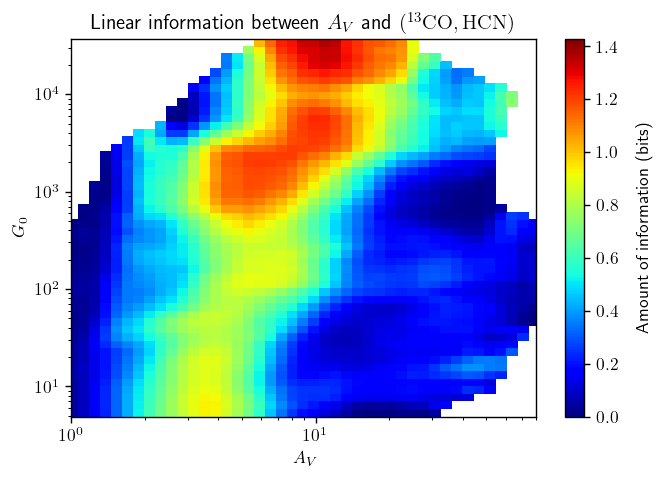

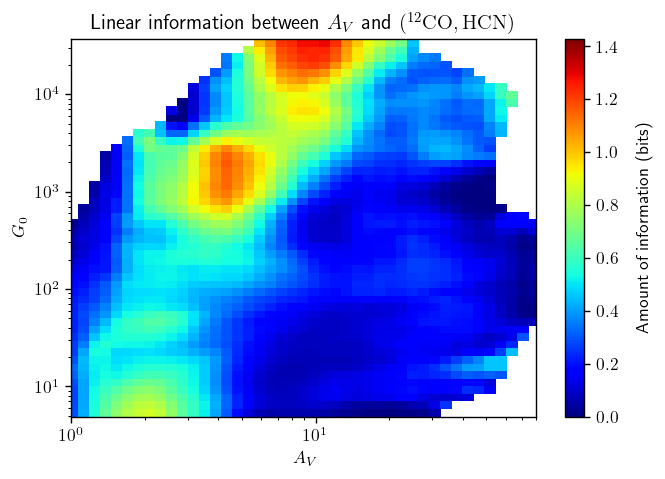

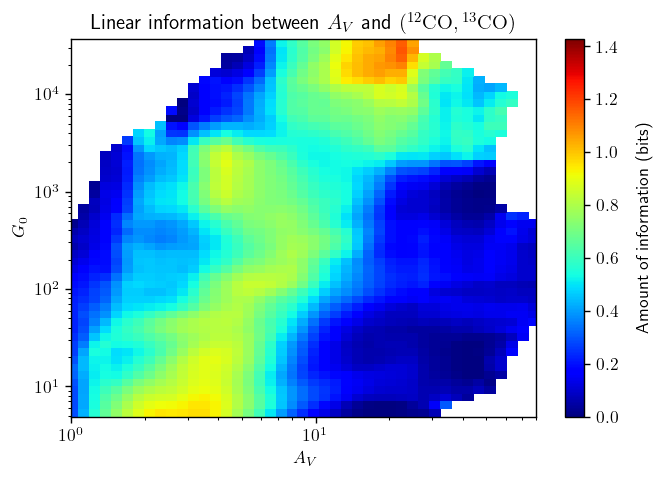

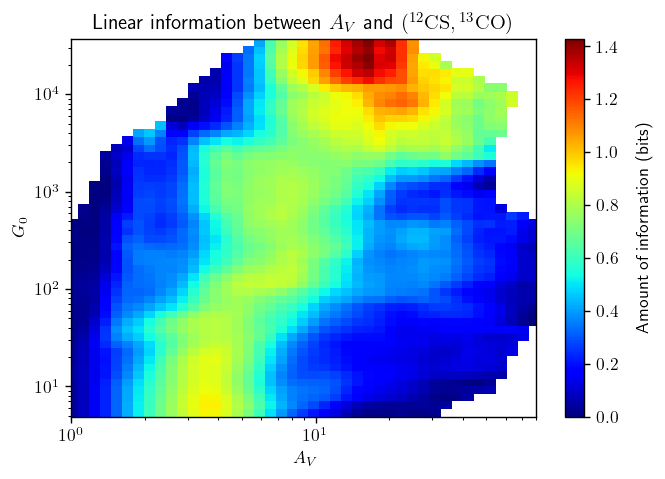

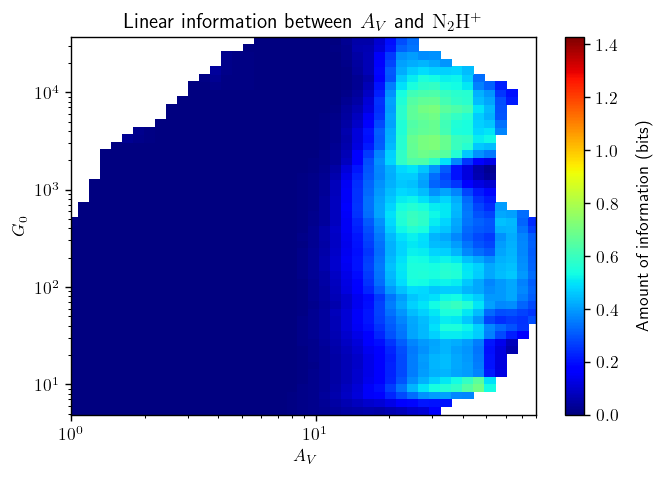

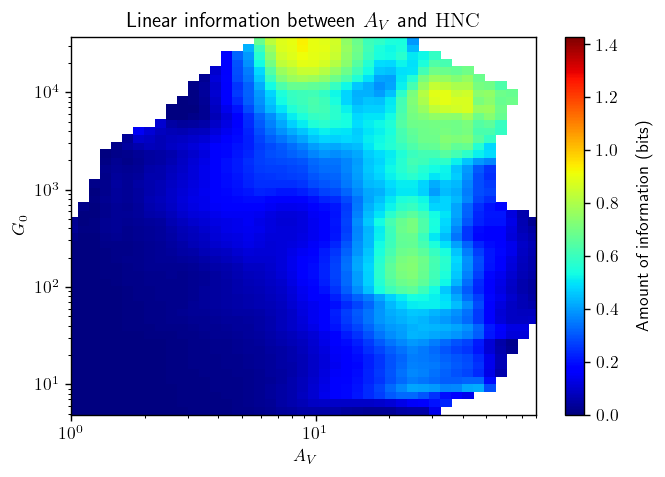

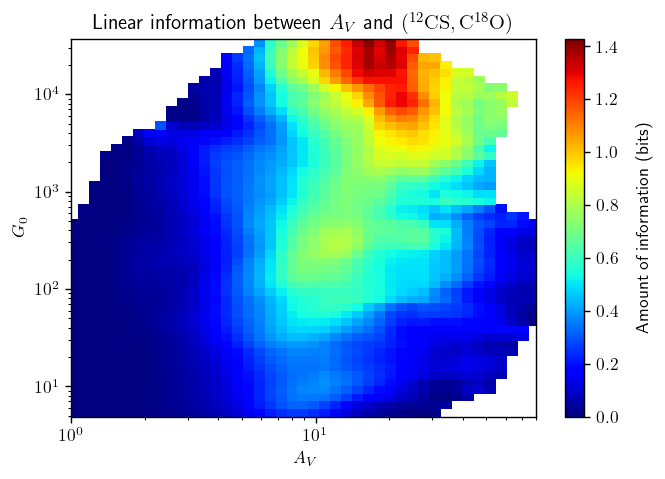

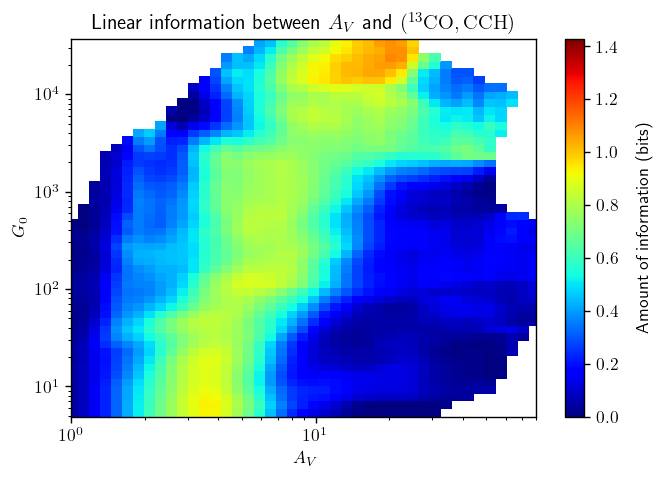

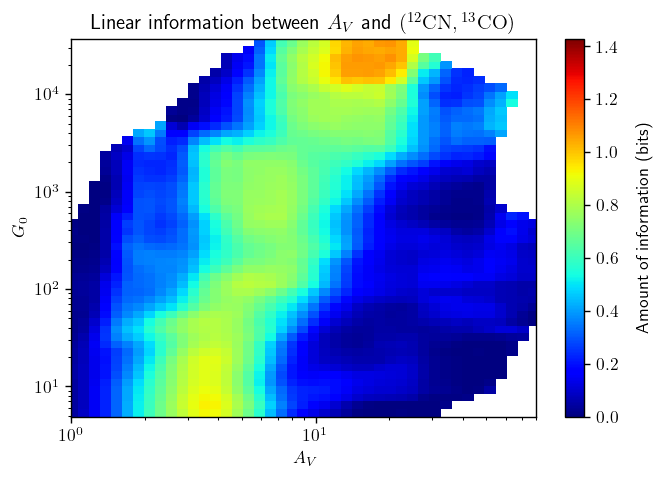

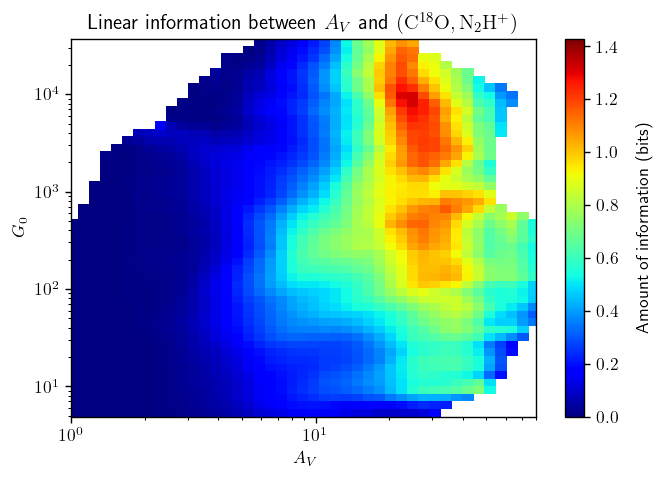

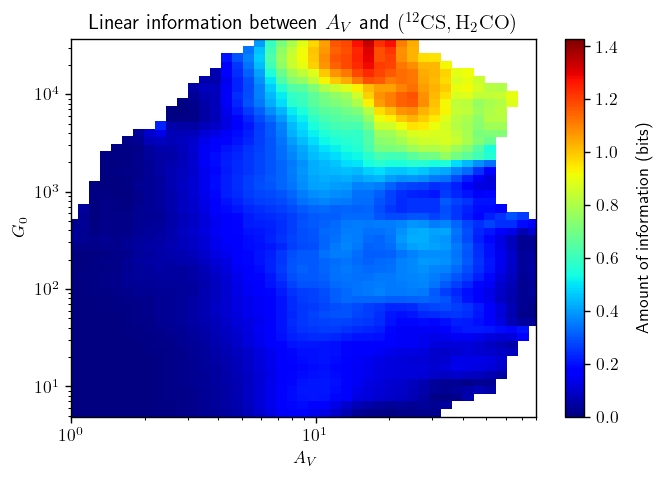

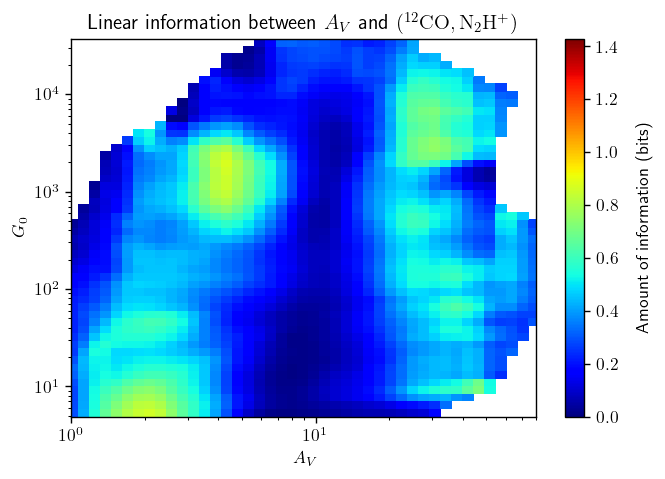

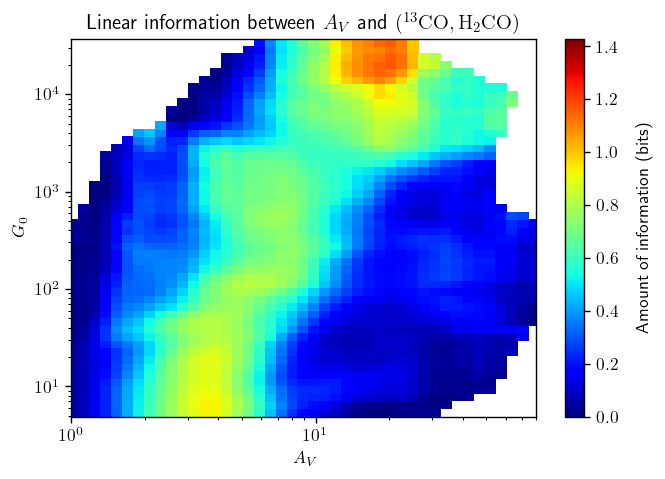

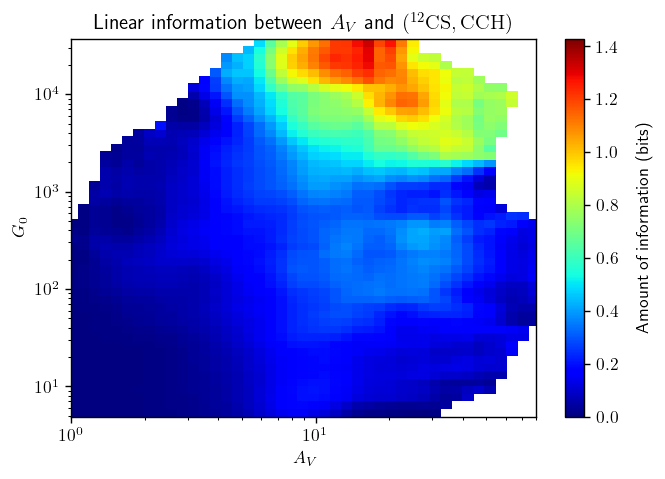

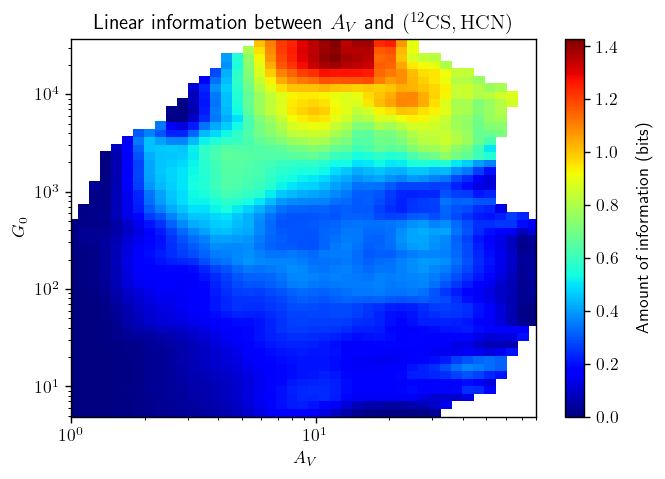

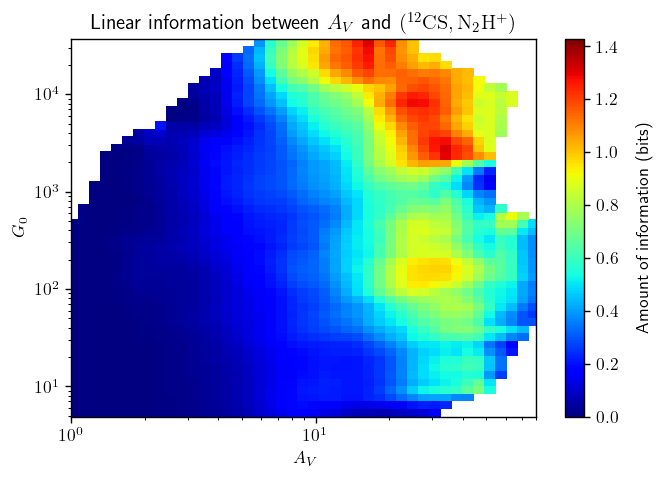

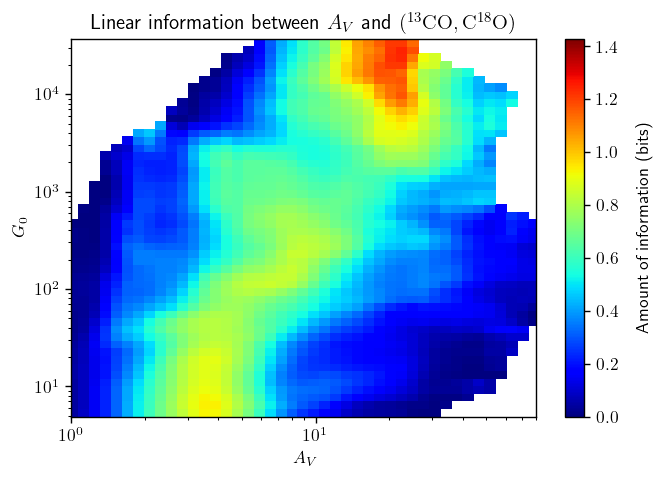

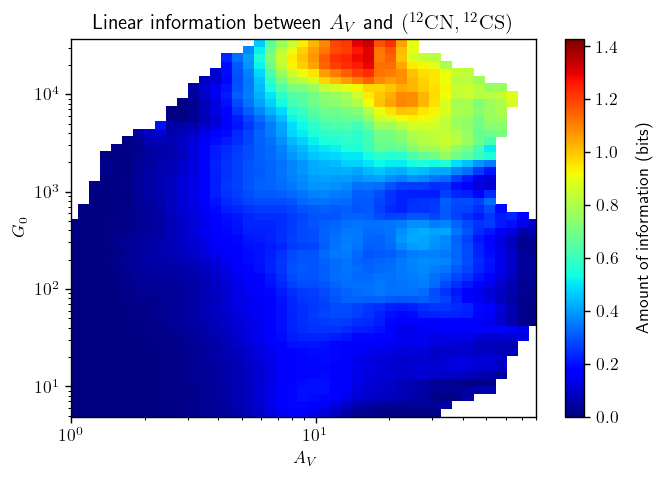

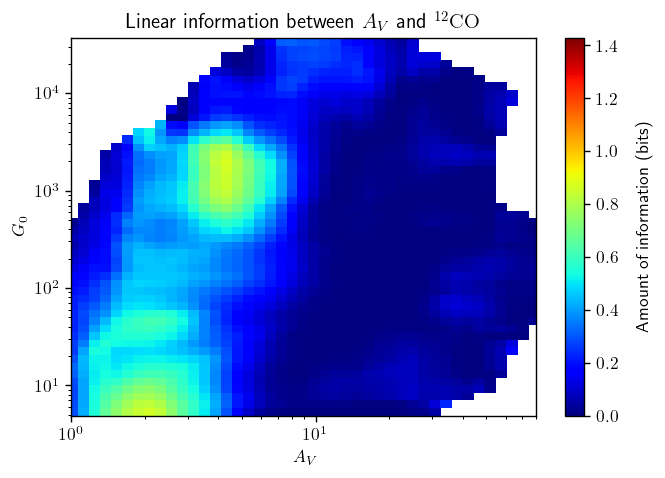

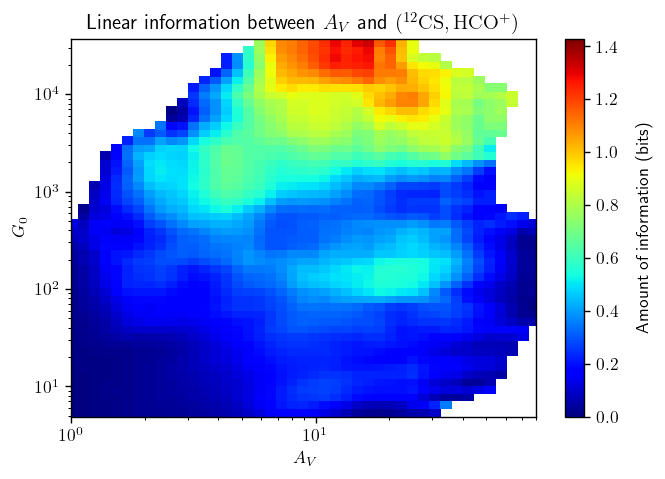

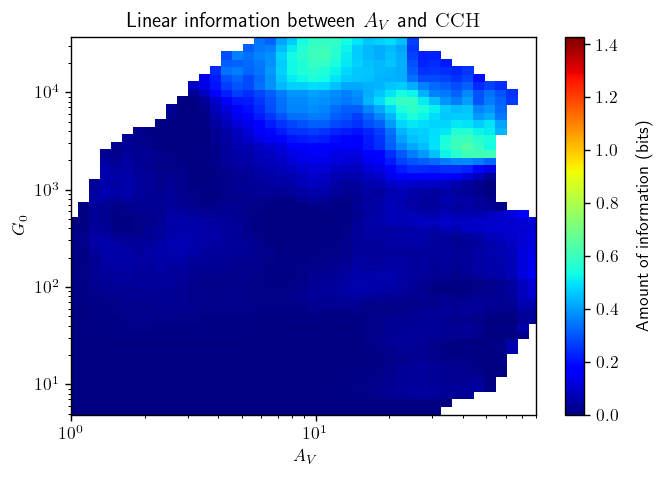

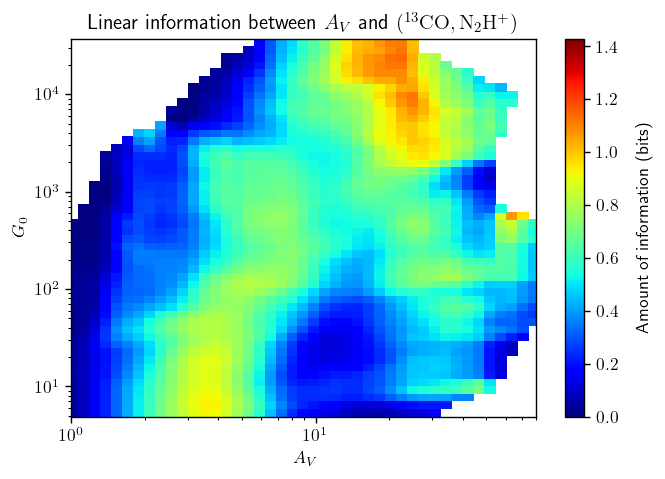

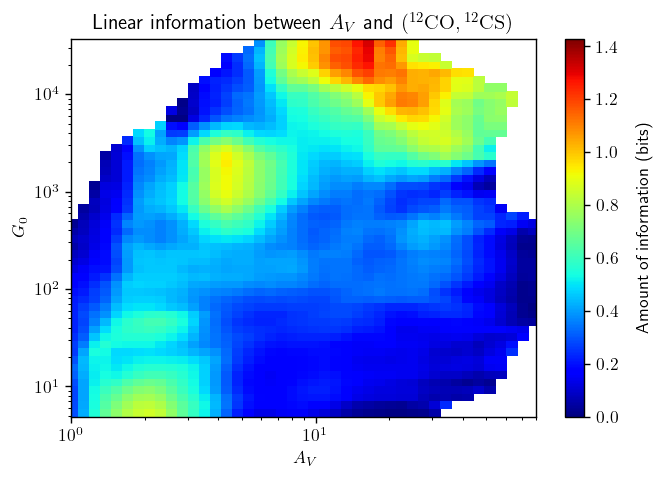

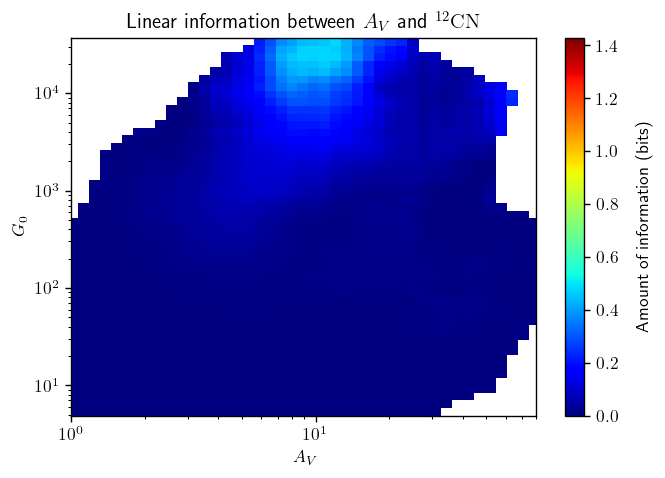

In [10]:
vmax = 0
for lines in lines_list:
    try:
        d = handler.read(
            params_target, lines, params_regime
        )
    except:
        continue
    vmax = max(vmax, np.nanmax(d['linearinfo']['data']))

for lines in lines_list:

    try:
        d = handler.read(
            params_target, lines, params_regime
        )
    except:
        continue

    xticks, yticks = d['linearinfo']['coords']
    mat_mi = d['linearinfo']['data'].T
    
    filename = f"{'_'.join(params_target)}__{'_'.join(lines)}_lin.png"
    fig = plotter.plot_mi_map(
        xticks, yticks, mat_mi,
        vmax=vmax, cmap="jet",
        paramx=params_regime[0], paramy=params_regime[1]
    )

    plt.xlim(lims[params_regime[0]]); plt.ylim(lims[params_regime[1]])
    plt.title(f"Linear information between ${plotter.params_comb_formatter(params_target)}$ and ${plotter.lines_comb_formatter(lines, short=True)}$")

    plt.savefig(os.path.join(figures_dir, filename))
    plt.show()

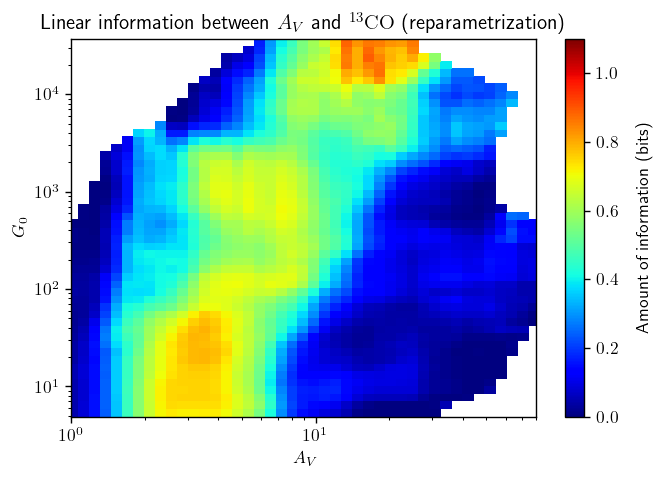

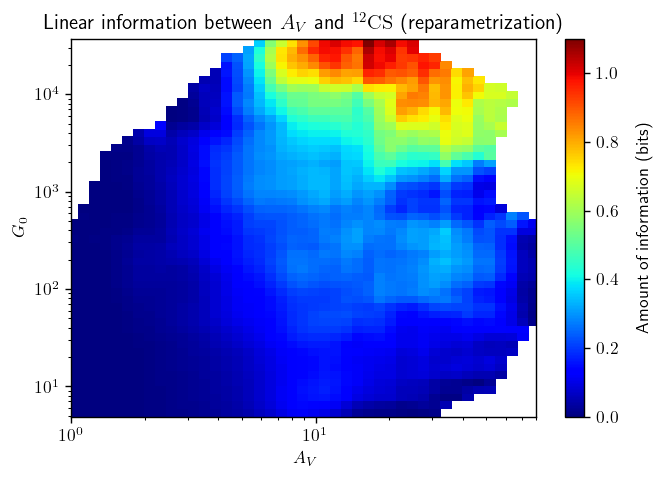

In [11]:
vmax = 0
for lines in lines_list:
    try:
        d = handler.read(
            params_target, lines, params_regime
        )
        d['linearinfogauss']['data']
    except:
        continue
    vmax = max(vmax, np.nanmax(d['linearinfogauss']['data']))

for lines in lines_list:

    try:
        d = handler.read(
            params_target, lines, params_regime
        )
        d['linearinfogauss']['data']
    except:
        continue

    xticks, yticks = d['linearinfogauss']['coords']
    mat_mi = d['linearinfogauss']['data'].T
    
    filename = f"{'_'.join(params_target)}__{'_'.join(lines)}_lingauss.png"
    fig = plotter.plot_mi_map(
        xticks, yticks, mat_mi,
        vmax=vmax, cmap="jet",
        paramx=params_regime[0], paramy=params_regime[1]
    )

    plt.xlim(lims[params_regime[0]]); plt.ylim(lims[params_regime[1]])
    plt.title(f"Linear information between ${plotter.params_comb_formatter(params_target)}$ and ${plotter.lines_comb_formatter(lines, short=True)}$ (reparametrization)")

    plt.savefig(os.path.join(figures_dir, filename))
    plt.show()